# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [31]:
#difference in stock price
df['diff'] = df['Adj Close'].diff().shift(-1)


In [32]:
df['target'] = np.sign(df['diff'])

In [33]:
df['premium'] = .08 * df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [35]:
y = df.loc[:"2023-09-30","target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [36]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [37]:
df['predictions'] = y_pred

In [38]:
df['profits'] = 0.

# True positive
df.loc[(df['predictions'] == 1) & (df['target'] == 1),'profits'] = df['premium']

# False positive
df.loc[(df['predictions'] == 1) & (df['target'] == -1),'profits'] = 100 * df['diff'] + df['premium']


In [39]:

df



,Adj Close,diff,target,premium,predictions,profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778061,16.675507,1.0,14.142245,1.0,14.142245
2023-06-30,193.453568,2.473389,1.0,15.476285,1.0,15.476285
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

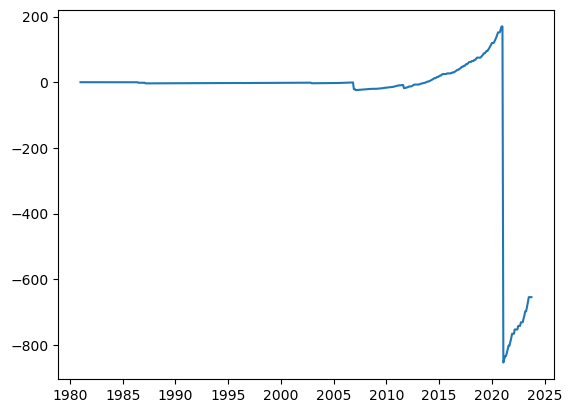

In [40]:
plt.plot(np.cumsum(df['profits']))

In [ ]:
# 5.5.)

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.